##Modificación para trazar un cuadrado en el complejo palne con centro en (z_c_r, z_c_i) y de tamaño zw x zh


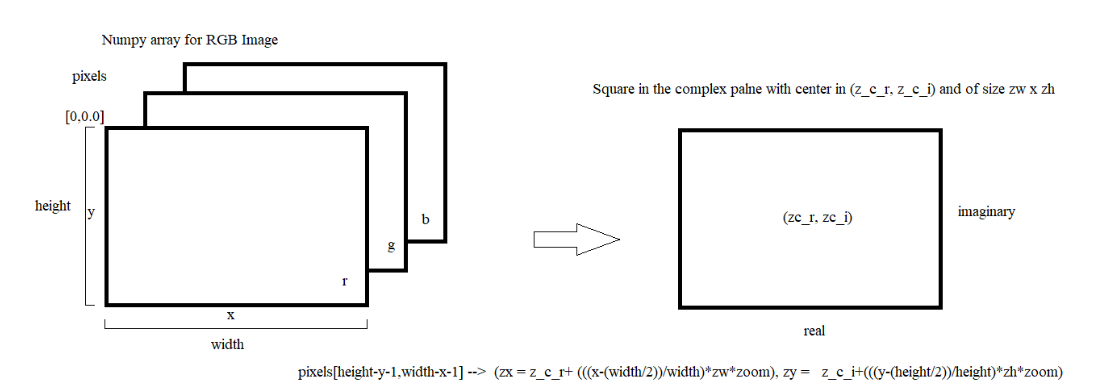

In [24]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [82]:
def f(l,z):
  
  if(l == 0):
    return (z**3)-1
  elif(l == 1):
    return z**3 - 2*z +2
  elif(l == 2):
    return z**8 + 15*(z**4)-16
  elif(l == 3):
    return z**6+z**3-1
  elif(l == 4):
    return sin(z)
  elif(l == 5):
    return cos(z)
  elif(l == 6):
    return cosh(z)-1

In [ ]:

def df(l,x):
  if(l == 0):
    return 2*x
  elif(l == 1):
    return 2*x-2
  elif(l == 2):
    return 2*x
  elif(l == 3):
    return 2*x
  else:
    return 2*x+2

In [151]:
def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=250, height=250, zoom=1,  niter=256, l=0):
    """ Fractals using newton-raphson """

    rem = Symbol("z", real = True)

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = complex(-0.5, math.sin(2*math.pi/3))
    r3 = complex(-0.5, -1*math.sin(2*math.pi/3))

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5
    fun = f(l,rem)
    
    for y in range(height):
        zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

        for x in range(width):
            zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

            # Mapping real -> complex plane
            z = complex(zx, zy)
            
            count = 0
            # print("hola")
            for i in range(niter):
                # complex numerical derivative
                

                der = diff(fun,rem)
                dz = complex(der.subs(rem,z))
                # print(dz)
                if dz == 0:
                    break

                count += 1
                if count > 255:
                    break
                t = factor_list(fun)
                # print(int(len(t[1]))*)
                # print(complex(fun.subs(rem,z)))
                znext = z - complex(fun.subs(rem,z)) / dz # Newton iteration
                #print(abs(znext - z), " | ", eps)

                if abs(znext - z) < eps: # stop when close enough to any root
                    break
                
                z = znext

            # Pixels colored using the roots
            if abs(z-r1)<eps:
                # color red
                pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
            elif abs(z-r2)<=eps:
                # color green
                pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
            elif abs(z-r3)<=eps:
                # color blue
                pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
            else:   
                pixels[height-y-1,x] = (0, 0, 0)

    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=250, height=250, zoom=1,  niter=256, l=0):
    
    """ Display a newton-raphson fractal """
    x = Symbol("z", real = True)
    fun = f(l,x)
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, l=l)
    
    plt.title('Newton Fractal f(z) = ' + str(fun))
    
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

##Plot of f(z)= z for the reals f(x)= z

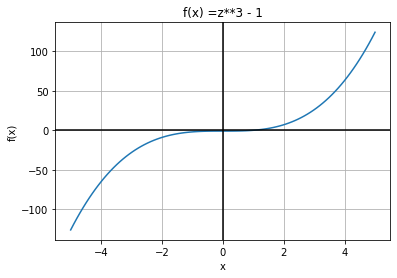

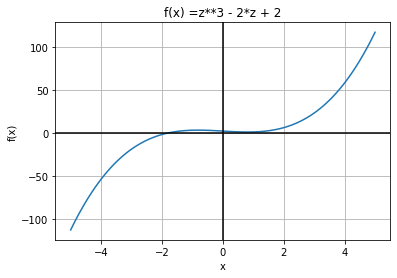

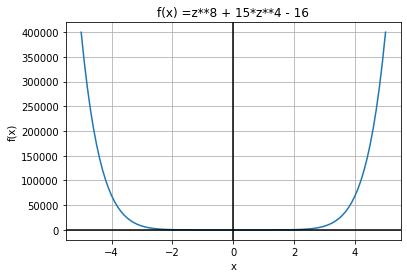

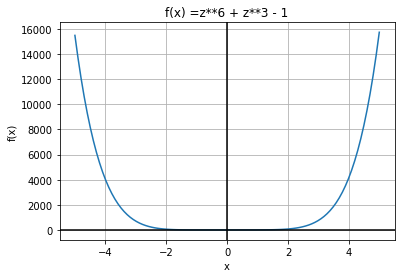

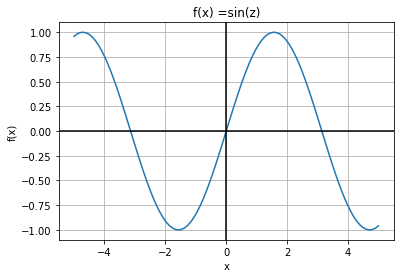

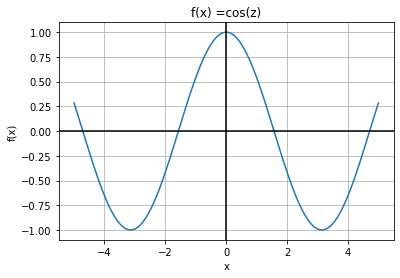

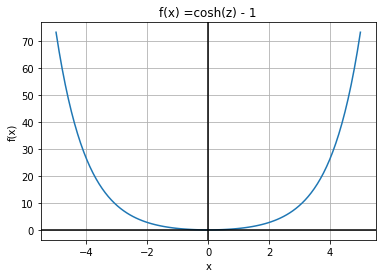

In [84]:

def tor(l):

  z = Symbol("z", real = True)
  x = np.linspace(-5.0,5.0,100)
  fig, ax = plt.subplots()
  s = f(l,z)
  m = []
  for i in x:
    m.append(s.subs(z,i))
  t = np.array(m)
  ax.plot(x,t)
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.grid(True, which='both')
  plt.title('f(x) =' + str(s))
  plt.xlabel('x')
  plt.ylabel('f(x)')

for i in range(7):
  tor(i)

##Graficas

In [152]:
print("zoom out")
display1(zoom=1,l=0)

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


KeyboardInterrupt: ignored

In [ ]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

In [62]:
from sympy import *
x = Symbol("z", real=True)
i=x**3+1
c = complex(0.5,-0.5)
# print(i.subs(x,c))
print(type(np.linspace(2,3,4)))
r = np.linspace(2,3,4)
print(len(r))
w = i.subs(x,np.linspace(2,3,4))
print(w)
print(np.linspace(2,3,4))
# print(complex(w))
# b = w.expand(complex=True)

# print(type(c**3+1))
# print(type(b))
# print(complex(b))

<class 'numpy.ndarray'>
4
z**3 + 1
[2.         2.33333333 2.66666667 3.        ]


In [3]:
x=Symbol('x', real=True)
a=E**(I*x)
b=a.expand(complex=True)
print(b)
c=a**3
d=c.expand(complex=True).expand(trig=True)
print(d)
print(re(d))
f=c.expand(complex=True)
print(re(f))
res=(re(f)-re(d)).expand(tring=True)
print(res)

I*sin(x) + cos(x)
-4*I*sin(x)**3 + 3*I*sin(x) + 4*cos(x)**3 - 3*cos(x)
4*cos(x)**3 - 3*cos(x)
cos(3*x)
-4*cos(x)**3 + 3*cos(x) + cos(3*x)


In [17]:
from sympy import *
import copy

x = Symbol('x')

print("\tFormula de uso\n")
formula = x**10 - 55*x**9 + 1320*x**8 - 18150*x**7 + 157773*x**6 - 902055*x**5 + 3416930*x**4 - 8409500*x**3 + 12753576*x**2 - 10628640*x + 3628800

print(formula,"\n")

#P, r = div(P, x-1)

formula1 = copy.copy(formula)

t = factor_list(formula)
print(len(t[1]))

	Formula de uso

x**10 - 55*x**9 + 1320*x**8 - 18150*x**7 + 157773*x**6 - 902055*x**5 + 3416930*x**4 - 8409500*x**3 + 12753576*x**2 - 10628640*x + 3628800 

10
